In [1]:
import pandas
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
data=pandas.read_csv("gbm-data.csv")
X=data.loc[:,'D1':'D1776']
y=data.loc[:,'Activity']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

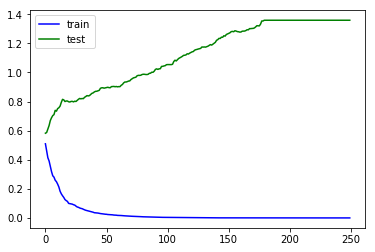

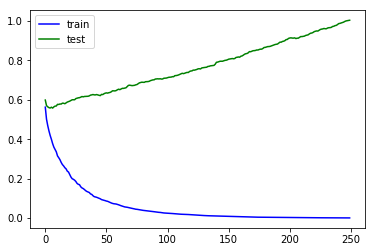

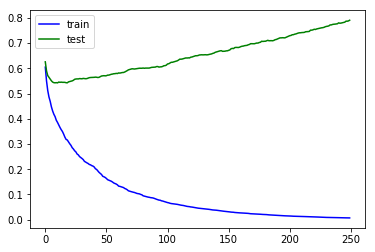

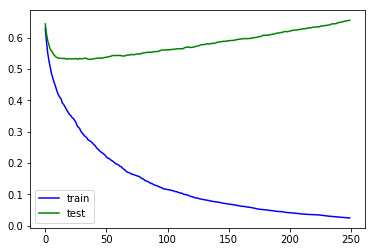

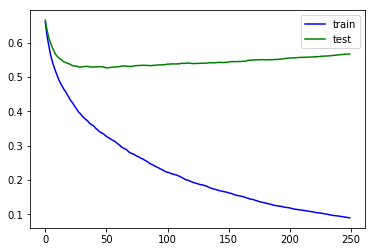

In [3]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
min_loss_results = {}
for i in learning_rate:
    clf = GradientBoostingClassifier(learning_rate=i,n_estimators=250,verbose=False,random_state=241)
    clf.fit(X_train, y_train)
    scores_train=list()
    for pr in clf.staged_decision_function(X_train):
        scores_train.append(log_loss(y_train,[1.0/(1+math.exp(-i)) for i in pr]))
    scores_test=list()
    for pr in clf.staged_decision_function(X_test):
        scores_test.append(log_loss(y_test,[1.0/(1+math.exp(-i)) for i in pr]))
    
    min_loss_value = min(scores_test)
    min_loss_index = scores_test.index(min_loss_value)
    
    min_loss_results[i] = min_loss_value, min_loss_index
    
    plt.figure()
    plt.plot(scores_train,'b')
    plt.plot(scores_test,'g')
    plt.legend(['train', 'test'])    
    

In [4]:
min_loss_value, min_loss_index

(0.5269201872275844, 51)

Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [5]:
print('overfitting')

overfitting


Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [6]:
min_loss_value,min_loss_index=min_loss_results[0.2]
min_loss_value,min_loss_index

(0.531094637596885, 36)

На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [7]:
clf=RandomForestClassifier(n_estimators=36,random_state=241)
clf.fit(X_train,y_train)
pred=clf.predict_proba(X_test)
log_loss(y_test, pred)

0.5413812861804069